This notebook will plot a 3-body problem and calculate the energy of the system over time. 

In [1]:
# Do necessary imports
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# For the Earth, Sun, Mercury 3-body Problem:

# Masses of the Planets
Me = 6e24                     # Mass of Earth in kg
Ms = 2e30                     # Mass of Sun in kg                       
Mm = 3.285e23                # Mass of Mercury in kg

# Initial Positions of the Planets (vectors)
Re = np.array([1.496e11*1,0,0]) #1 AU away from the sun converted to m
Rs = np.array([0,0,0])
Rm = np.array([1.496e11*0.387,0,0]) #0.387 AU away from the sun converted to m

# Initial Velocity of the Planets (vectors)
# currently random numbers to see if code runs
Ve = np.array([0,30e3,0])
Vs = np.array([0,0,0])
Vm = np.array([0,47e3,0])


u_0 = np.array([Re[0], Re[1], Re[2],
                Rs[0], Rs[1], Rs[2],
                Rm[0], Rm[1], Rm[2],
                Ve[0], Ve[1], Ve[2],
                Vs[0], Vs[1], Vs[2],
                Vm[0], Vm[1], Vm[2]])

G = 6.673e-11                 # Gravitational Constant

In [13]:
# Calculate the gravitional force on a body given the position vectors and the masses of the bodies
# ====================================================================================================================

def Gravitational_Force(ri, rj, mi, mj, G=6.673e-11):
    return ((G*mi*mj*(np.array(rj)-np.array(ri)))/(np.linalg.norm(np.array(rj)-np.array(ri)))**3)

def force(planet, Re, Rs, Rm):
    force_sun_on_earth = Gravitational_Force(Re,Rs,Me,Ms)
    force_earth_on_sun = -force_sun_on_earth
    force_mercury_on_earth = Gravitational_Force(Re,Rm,Me,Mm)
    force_earth_on_mercury = -force_mercury_on_earth
    force_sun_on_mercury = Gravitational_Force(Rm,Rs,Mm,Ms)
    force_mercury_on_sun = -force_sun_on_mercury
    
    if planet == "earth":
        return force_sun_on_earth + force_mercury_on_earth
    if planet == "sun":
        return force_earth_on_sun + force_mercury_on_sun
    if planet == "mercury":
        return force_sun_on_mercury + force_earth_on_mercury
    
def acc_planet(planet,Re,Rs,Rm,M):
    a = force(planet, Re, Rs, Rm)/M
    return a
    
def f_true(u):
    Re = [u[0], u[1], u[2]]
    Rs = [u[3], u[4], u[5]]
    Rm = [u[6], u[7], u[8]]

    a_earth = acc_planet('earth',Re,Rs,Rm,Me)
    a_sun = acc_planet('sun',Re,Rs,Rm,Ms)
    a_mercury = acc_planet('mercury',Re,Rs,Rm,Mm)
    

    udot = np.array([u[9], u[10], u[11],
                     u[12], u[13], u[14],
                     u[15], u[16], u[17],
                     a_earth[0], a_earth[1], a_earth[2],
                     a_sun[0], a_sun[1], a_sun[2], 
                     a_mercury[0], a_mercury[1], a_mercury[2]])
    
    return udot

In [14]:
# IVP Forward Euler Code
import numpy as np

def ivp_forward_euler(u_0, T, delta_t):
    """Returns the predicted system evolution over time using the forward Euler method.

    This function assumes an f_true(u) function is globally available for calculating the true function value at u.
    
    Parameters
    ----------
    u_0 : array
        1 x N array defining the initial state vector u_0 where N = number of state variables = |u|
    T : float_like
        Final time T
    delta_t : float_like
        Time step size where delta_t = t_{k+1} - t_k
        
    Returns
    -------
    u : array
        K x N array of the predicted states where row k is the state at time step k and K = number of time steps
    times : array_like
        Length K vector containing the times t corresponding to time steps
    """
    

    times = np.arange(0, T+delta_t,delta_t)
    u = np.zeros((len(times),len(u_0)))
    for i in range(len(times)):
        if i == 0:
            u[0] = u_0
        else:  
            u[i] = u[i-1] + delta_t*f_true(u[i-1])
    
    return u, times
    

In [15]:
# Functions to calculate energy of the system 
# ==================================================================================================================

# Calculate the kinetic energy
def Kinetic_Energy(m,v):
    v_n = np.linalg.norm(v)
    return 0.5*m*v_n**2

# Calculate the magnitude of the potential energy to be used when calculating the total energy
def PE_mag(mi,mj,ri,rj,G=6.673e-11):
    return G*mi*mj/np.linalg.norm(ri-rj)

# Calculate the total energy for the 3-body problem
def Total_Energy(m1,m2,m3,r1,r2,r3,v1,v2,v3):
    total_KE = Kinetic_Energy(m1,v1)+Kinetic_Energy(m2,v2)+Kinetic_Energy(m3,v3)
    total_PE = -(PE_mag(m2,m1,r2,r1)+PE_mag(m3,m1,r3,r1)+PE_mag(m3,m2,r3,r2))
    return total_KE + total_PE

[[ 1.49600000e+11  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.70000000e+04  0.00000000e+00]
 [ 1.49600000e+11  2.59200000e+09  0.00000000e+00 ... -3.44016463e+03
   4.70000000e+04  0.00000000e+00]
 [ 1.49555484e+11  5.18400000e+09  0.00000000e+00 ... -6.85509763e+03
   4.67604744e+04  0.00000000e+00]
 ...
 [ 6.64360418e+10  1.97276095e+11  0.00000000e+00 ...  6.64125772e+03
  -2.44782832e+04  0.00000000e+00]
 [ 6.43380405e+10  1.98021598e+11  0.00000000e+00 ...  6.87450319e+03
  -2.43367345e+04  0.00000000e+00]
 [ 6.22327003e+10  1.98745310e+11  0.00000000e+00 ...  7.10490489e+03
  -2.41936719e+04  0.00000000e+00]]


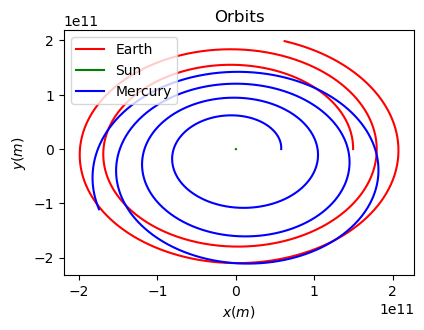

In [17]:
import matplotlib.pyplot as plt
plt.style.use('default')

delta_t = 86400
fig1 = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig1.add_subplot(221)

u, times = ivp_forward_euler(u_0, 9.5e7, 86400)

print(u)

ax1.plot(u[:,0],u[:,1],"r", label = "Earth")
ax1.plot(u[:,3],u[:,4],"g", label = "Sun")
ax1.plot(u[:,6],u[:,7],"b", label = "Mercury")

ax1.set_title("Orbits")
ax1.set_xlabel("$x(m)$")
ax1.set_ylabel("$y(m)$")
ax1.legend()